Enter Strike Price (K):  100
Enter Premium (P):  5
Enter Spot Price Range (e.g., enter 50 for K-50 to K+50):  50


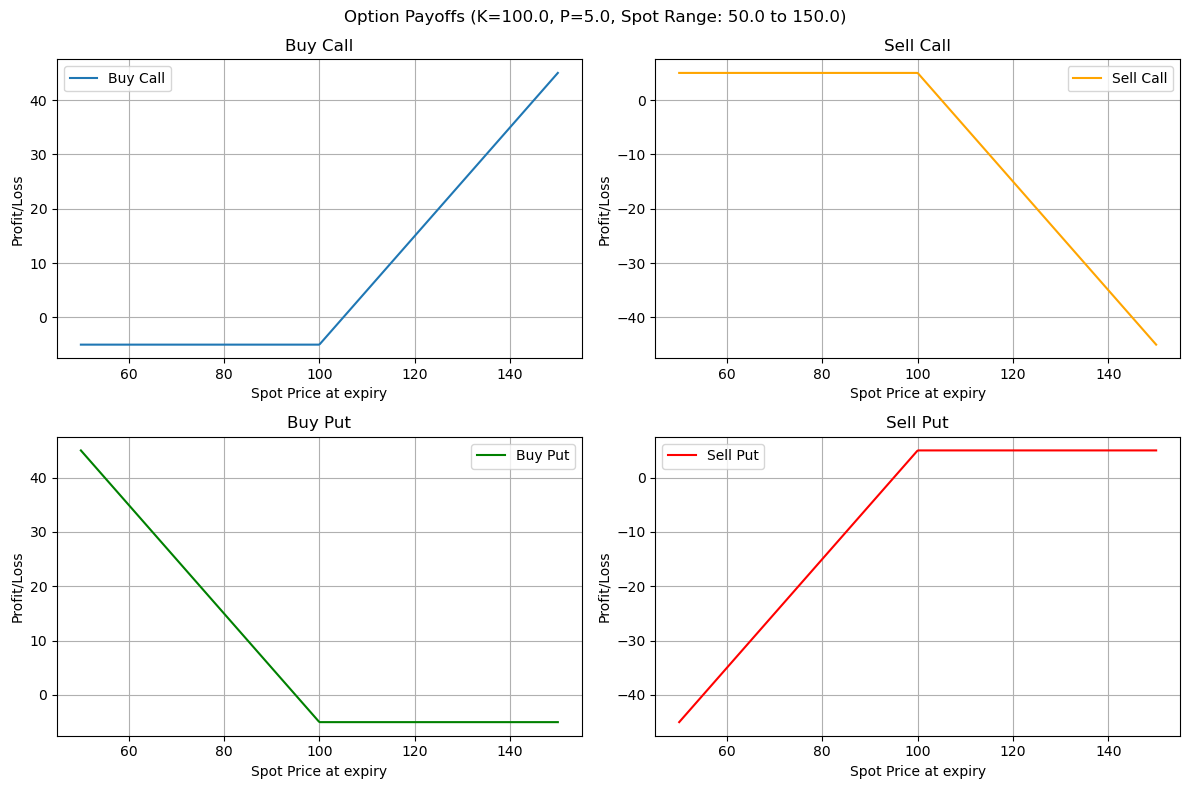

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# User inputs
K = float(input("Enter Strike Price (K): "))
P = float(input("Enter Premium (P): "))
spot_range = int(input("Enter Spot Price Range (e.g., enter 50 for K-50 to K+50): "))

# Generate spot prices
spot_prices = np.linspace(K - spot_range, K + spot_range, 500)

# Payoff functions
def buy_call(S, K, P):
    return np.maximum(0, S - K) - P


def sell_call(S, K, P):
    return P - np.maximum(0, S - K)


def buy_put(S, K, P):
    return np.maximum(0, K - S) - P


def sell_put(S, K, P):
    return P - np.maximum(0, K - S)


# Calculate payoffs
payoff_buy_call = buy_call(spot_prices, K, P)
payoff_sell_call = sell_call(spot_prices, K, P)
payoff_buy_put = buy_put(spot_prices, K, P)
payoff_sell_put = sell_put(spot_prices, K, P)

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle(f"Option Payoffs (K={K}, P={P}, Spot Range: {K-spot_range} to {K+spot_range})")

# Plot each position
axs[0, 0].plot(spot_prices, payoff_buy_call, label="Buy Call")
axs[0, 0].set_title("Buy Call")
axs[0, 0].set_ylabel("Profit/Loss")
axs[0, 0].set_xlabel("Spot Price at expiry")
axs[0, 0].grid(True)
axs[0, 0].legend()

axs[0, 1].plot(spot_prices, payoff_sell_call, label="Sell Call", color='orange')
axs[0, 1].set_title("Sell Call")
axs[0, 1].set_ylabel("Profit/Loss")
axs[0, 1].set_xlabel("Spot Price at expiry")
axs[0, 1].grid(True)
axs[0, 1].legend()

axs[1, 0].plot(spot_prices, payoff_buy_put, label="Buy Put", color='green')
axs[1, 0].set_title("Buy Put")
axs[1, 0].set_ylabel("Profit/Loss")
axs[1, 0].set_xlabel("Spot Price at expiry")
axs[1, 0].grid(True)
axs[1, 0].legend()

axs[1, 1].plot(spot_prices, payoff_sell_put, label="Sell Put", color='red')
axs[1, 1].set_title("Sell Put")
axs[1, 1].set_ylabel("Profit/Loss")
axs[1, 1].set_xlabel("Spot Price at expiry")
axs[1, 1].grid(True)
axs[1, 1].legend()

plt.tight_layout()
plt.show()


In [ ]:
'''
Observations:
1. Buy Call:
Below Strike (S < K): The payoff is negative and constant at -P (the premium paid).
At Strike (S = K): Payoff is still -P.
Above Strike (S > K): The payoff increases linearly with the spot price. The breakeven point is at S = K + P.
Maximum Loss: Limited to the premium paid (-P).
Maximum Gain: Unlimited as spot price rises.

2. Sell Call:
Below Strike (S < K): The payoff is positive and constant at +P (the premium received).
At Strike (S = K): Payoff is still +P.
Above Strike (S > K): The payoff decreases linearly as the spot price rises. The breakeven point is at S = K + P.
Maximum Gain: Limited to the premium received (+P).
Maximum Loss: Unlimited as spot price rises.

3. Buy put:
Below Strike (S < K): The payoff increases as the spot price decreases. The breakeven point is at S = K - P.
At Strike (S = K): Payoff is -P.
Above Strike (S > K): The payoff is constant at -P.
Maximum Loss: Limited to the premium paid (-P).
Maximum Gain: Limited (to K - P if spot price goes to zero).

4. Sell put:
Below Strike (S < K): The payoff decreases as the spot price falls. The breakeven point is at S = K - P.
At Strike (S = K): Payoff is +P.
Above Strike (S > K): The payoff is constant at +P.
Maximum Gain: Limited to the premium received (+P).
Maximum Loss: Limited (to P − K if spot price goes to zero)

'''